# 1.このテキストについて

### テキストの目的
実データに近いものの分析を行う
データセットに対して自ら課題を設定できるようにする

### どのように学ぶか
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

# 2.信用情報

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。
<br>
[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)
<br>

Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


1. Home Creditはどのような企業？
 - 信用取引履歴が少ない、銀行口座を持たないといった弱い立場のユーザに対して、他の方法で顧客の返済能力を予測することで、ローンを組むことができるように信用情報を提供している企業。
2. このコンペティションでは何を予測する？
 - 顧客の返済能力
3. それを予測することで企業が得られるメリットは何？
 - 返済能力のある顧客が拒否されないことを保証し、ローンは元本、満期、返済カレンダーで与えられ、顧客が返済を完了するよう援助するメリットがある。

### データセットの準備
データセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。


Dataページ内の他のcsvファイルはこの課題では扱いません。



In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

application_train = pd.read_csv('application_train.csv')

### Notebooksについて
コンペティションのNotebooksページで公開されているものを活用してください。


《推奨参考Notebooks》


[Home Credit Default Risk Extensive EDA | Kaggle](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)


[HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle](https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772)


[HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle](https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp)


この他タイトルにEDAと付いているものを参考にしてください。

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

In [2]:
display(application_train.head(5))
display(application_train.info())
display(application_train.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


307,511件のローンのデータがあり、列数は122です。

目的変数: TARGET

- 1: 支払が困難なクライアント = クライアントが最初のY回の分割払いの内に少なくとも一回でX日以上延滞していた場合
- 0: それ以外の場合

**欠損値の確認**

In [3]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [4]:
missing_data_df = missing_data(application_train)

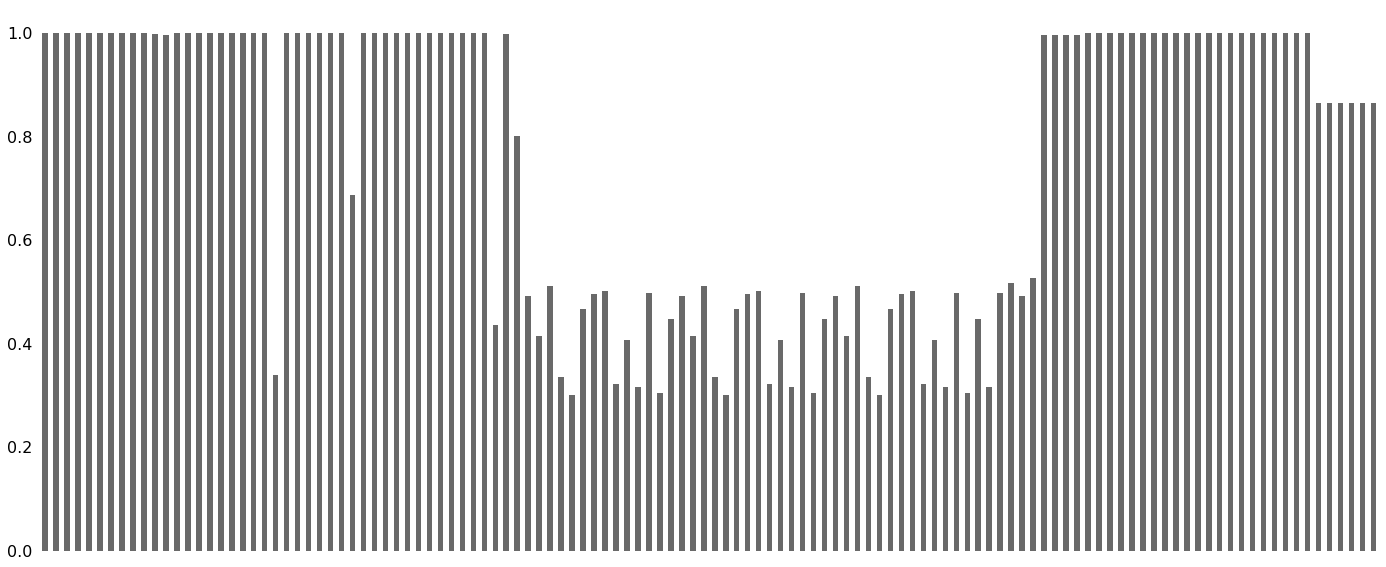

In [5]:
msno.bar(application_train)

**目的変数の内容**

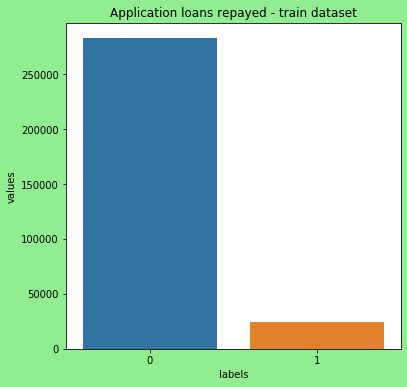

In [6]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6), facecolor='lightgreen')
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

**課題**
- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける（目的変数が質的変数のため、特徴量との相関関係は現れなかった）
- いくつかの特徴量における、目的変数との関係をグラフ化する

**疑問**
- 各説明変数のデータの内容を理解する
- ほとんどのクライアントがローンを借入できてる要因は？


## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

### 欠損値が10％以上含まれる特徴量を削除し、目的変数との相関関係をヒートマップにする

In [7]:
missing_data_df.head(4)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963


In [8]:
threshold = 10 #10%以上欠損値を含む
many_missing_data_index = missing_data_df.query("Percent >= {}".format(threshold)).index
application_train_dropped = application_train.drop(many_missing_data_index, axis=1)
application_train_dropped.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
application_train_dropped.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

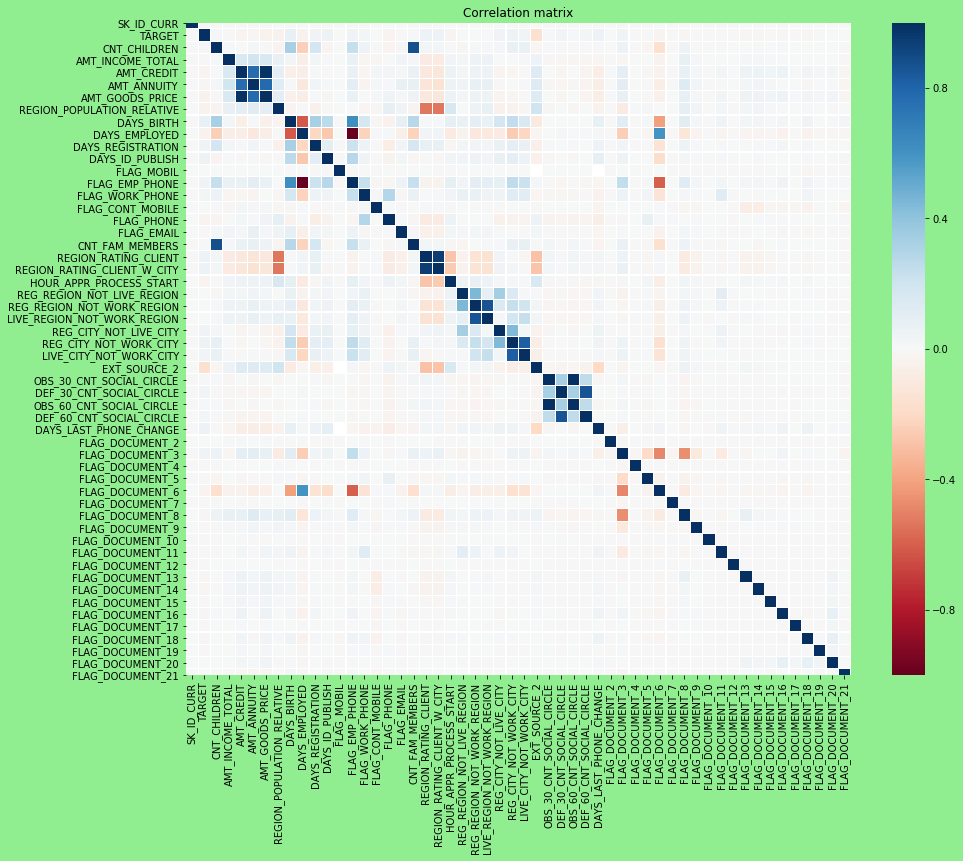

In [34]:
df_corr = application_train_dropped.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(15, 12), facecolor='lightgreen')
plt.title('Correlation matrix')
sns.heatmap(df_corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

In [11]:
df_corr_target  = df_corr["TARGET"].sort_values(ascending=False)
print(df_corr_target[1:11])

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64


**目的変数と特徴量では相関関係はない。目的変数が２値のみの質的変数のため相関がでなかった。**

### いくつかの特徴量における、目的変数との関係をグラフ化する

**特徴量名から棒グラフを作成して表示するユーザ関数を定義**

In [30]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6), facecolor='lightgreen')
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14), facecolor='lightgreen')
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

**特徴量名から分布を作成して表示するユーザ関数を定義**

In [31]:
def plot_distribution(var):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(2,2,figsize=(12,12), facecolr='lightgreen')

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

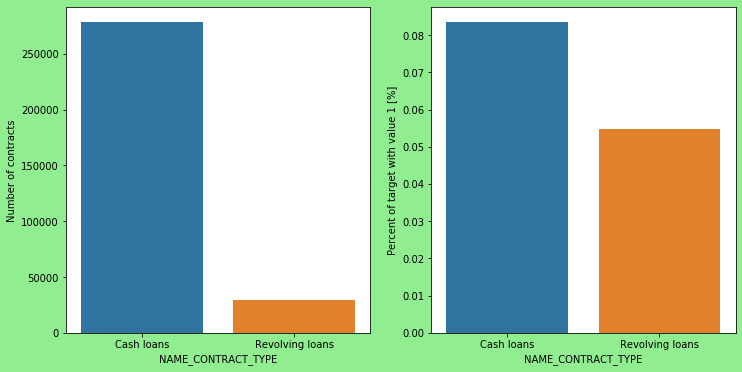

In [32]:
plot_stats('NAME_CONTRACT_TYPE')

**１：契約型リボルビングローンは、総借入件数の 10％とごくわずかであるが、同時に返済されていないリボルビングローンが頻度に比べて多くなっている。
<br><br>現金のローンの方が返済率が高いことがわかる。**

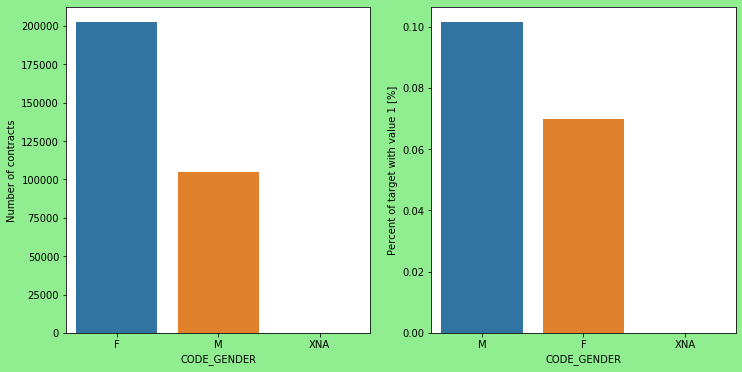

In [35]:
plot_stats('CODE_GENDER')

**２：女性の顧客数は男性の顧客数のほぼ2倍である。一方で、債務不履行の割合を見てみると、男性（〜１０％）は女性（～7％）と比較して、ローンを返さない確率が高い。
<br><br>女性の顧客の方が返済率が高い。**

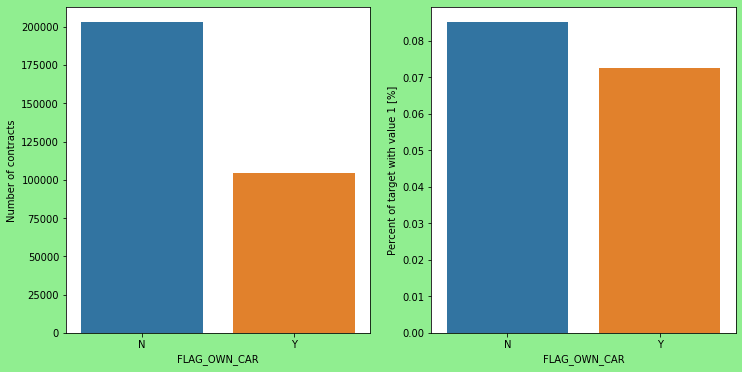

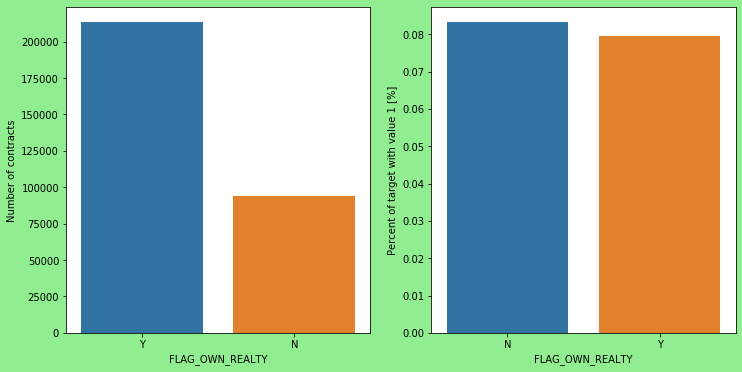

In [36]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

**３、４：車を所有している顧客（Y）は、車を所有していない顧客（N）のほぼ半分です。車を所有している顧客は、車を所有していない顧客の頻度に比べ、返済しない可能性が高いです。両方のカテゴリは、8％前後の未返済率である。**
<br>
**不動産を所有している顧客（Y)は、所有していない顧客（N)の2倍以上である。しかし。両方のカテゴリは、8％未満の未返済率である。
<br><br>
不動産を所有している顧客の方が返済率が高いことがわかる**

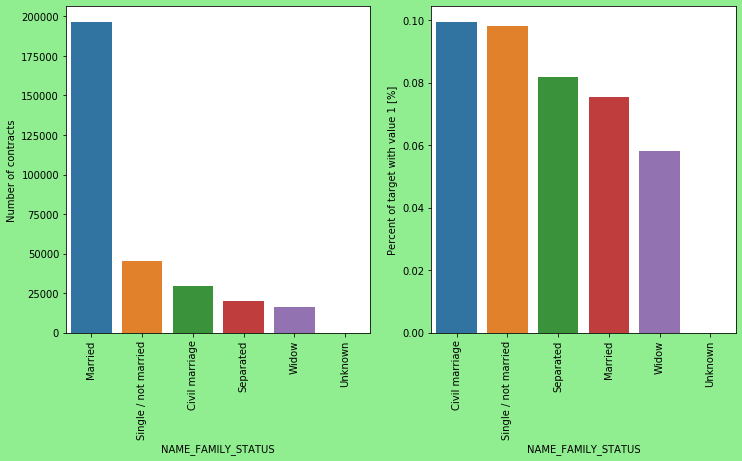

In [37]:
plot_stats('NAME_FAMILY_STATUS',True, True)

**５：結婚(教会婚)している人が最も多く、次いで独身・未婚、結婚（民事婚）が続いている。
<br>
ローンを返済していない割合では、結婚（民事婚）が最も高く（10％）、未亡人が最も低くなっています（例外は不明）。
<br><br>
民事婚や未婚の顧客の未返済率が高く、既婚（教会婚）の未返済率は低い**

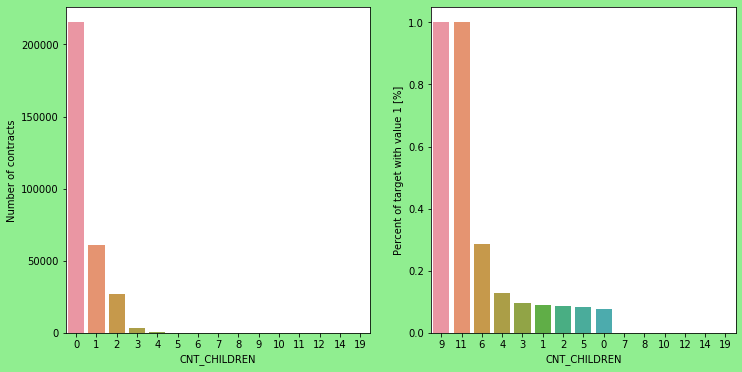

In [38]:
plot_stats('CNT_CHILDREN')

**６：ほとんどの顧客は子供がいない。また、子供が多いほど、ローンの未返済率が高くなる傾向があり、９、１１人子供がいる顧客は１００％返済していない。
<br><br>
子供が少ない顧客の方が、返済率が高く、６人以上子供がいる顧客の未返済率は高い。**

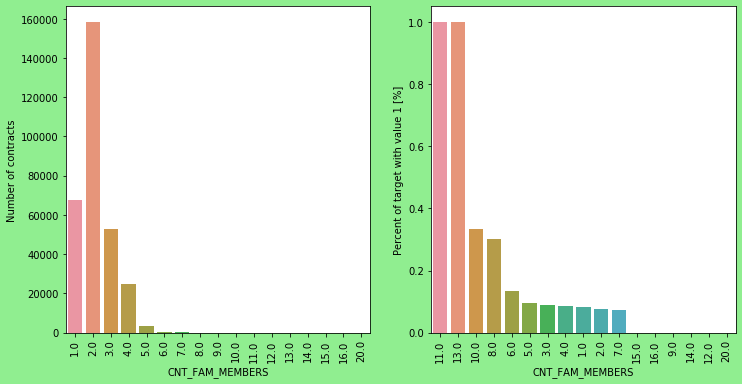

In [39]:
plot_stats('CNT_FAM_MEMBERS',True)

**７：家族構成は2人が最も多く、1人（単身者）、3人（子供1人家族）、4人の順となっています。
<br>
家族構成が11人、13人の場合、返済不能率は100％となっています。その他の家族構成が 10 人、8 人の世帯では、返済していない割合が 30％を超えている。6人以下の世帯では、平均10％に近い返済率となっています。
<br><br>
世帯数の少ない顧客の方が返済率が高く、８人以上の世帯では、未返済率が高い。**

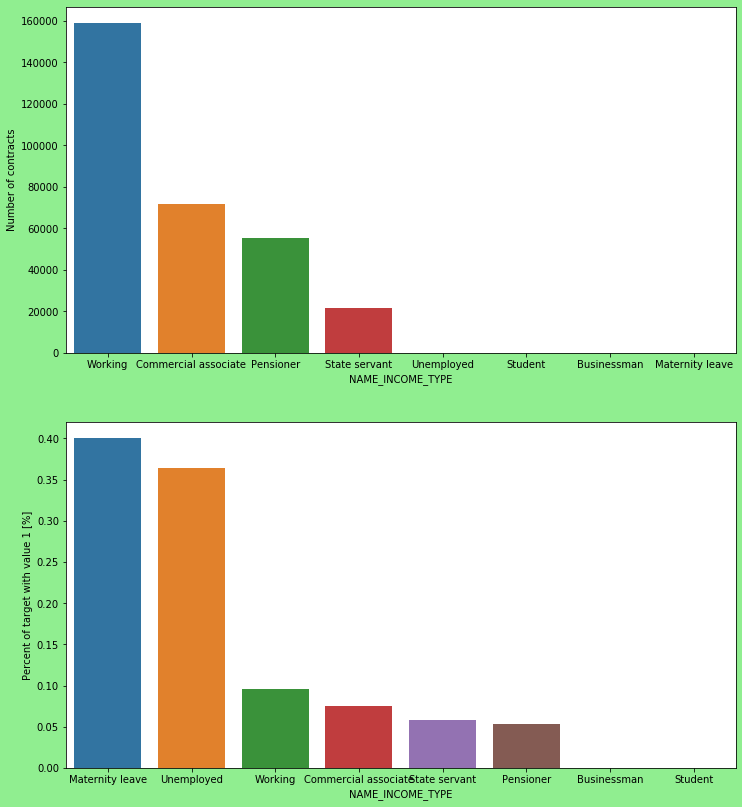

In [40]:
plot_stats('NAME_INCOME_TYPE',False,False)

**８：融資を希望する者のほとんどが就労収入であり、次いで商業関係者、年金受給者、国家公務員の順となっている。
<br>
収入のある申請者のうち、産休を取得している場合、ローンを返していない割合が 40％近くあり、次いで無職（37％）である。それ以外の収入のタイプは未返済率が平均の10％を下回っている。**

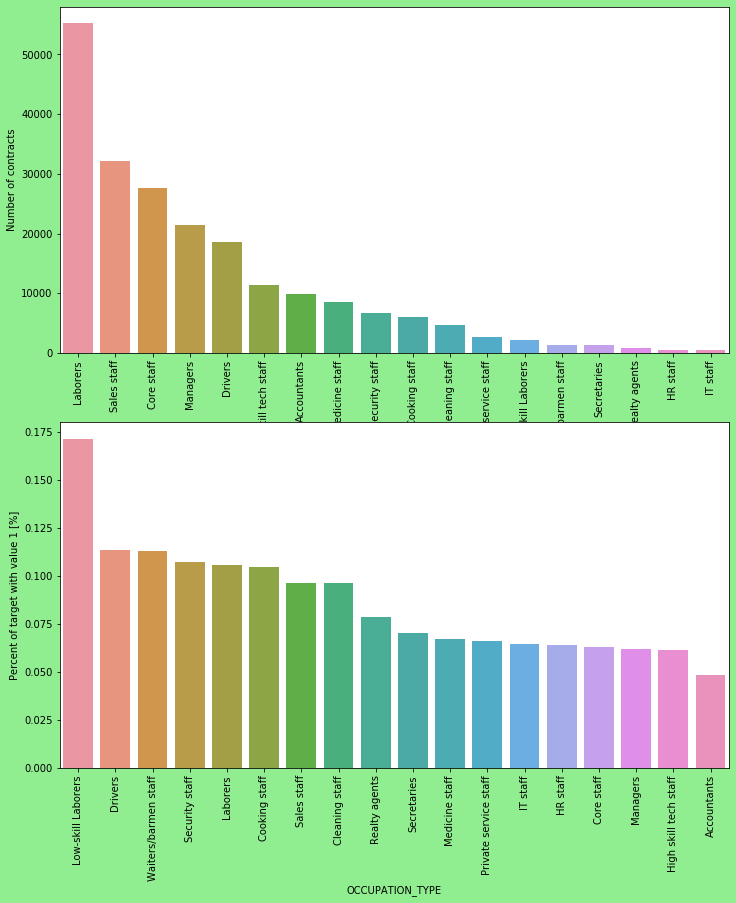

In [42]:
plot_stats('OCCUPATION_TYPE',True, False)

**９：融資額が最も多いのは社労士、次いで営業職。IT 関連職が最も低い。
<br>
未返済率が最も高いのは「低技能労働者」（17％以上）で、次いで「運転手・接客・調理スタッフ」「警備スタッフ」「労働者」「調理スタッフ」の順となっている。**

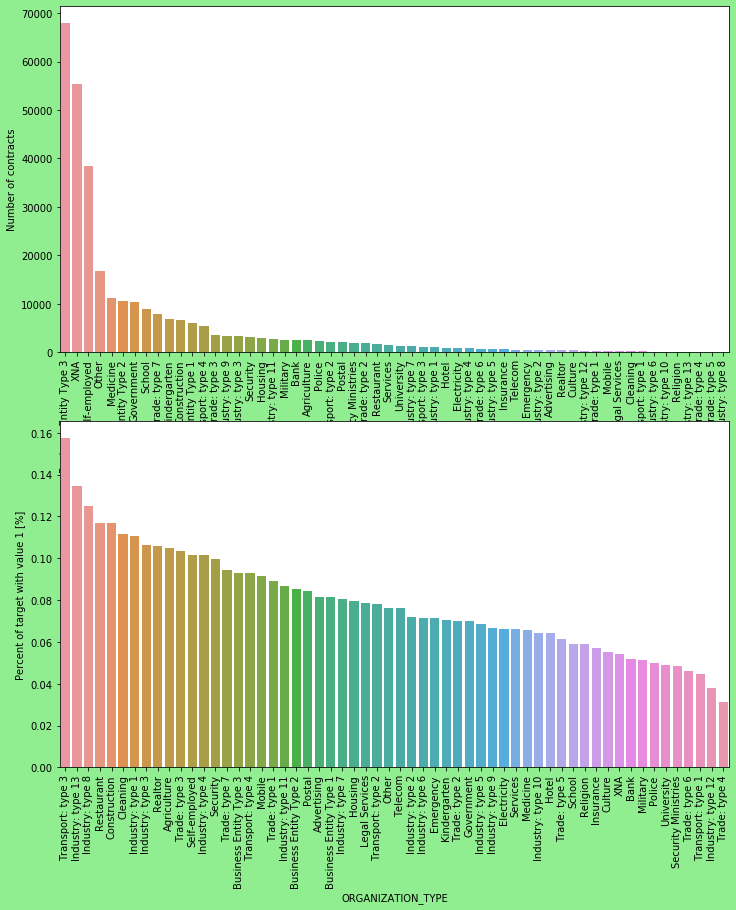

In [43]:
plot_stats('ORGANIZATION_TYPE',True, False)

**10：返済されていないローンの割合が最も高い組織は、運輸業3種（16％）、産業13種（13.5％）、産業8種（12.5％）、飲食店（12％未満）である。**

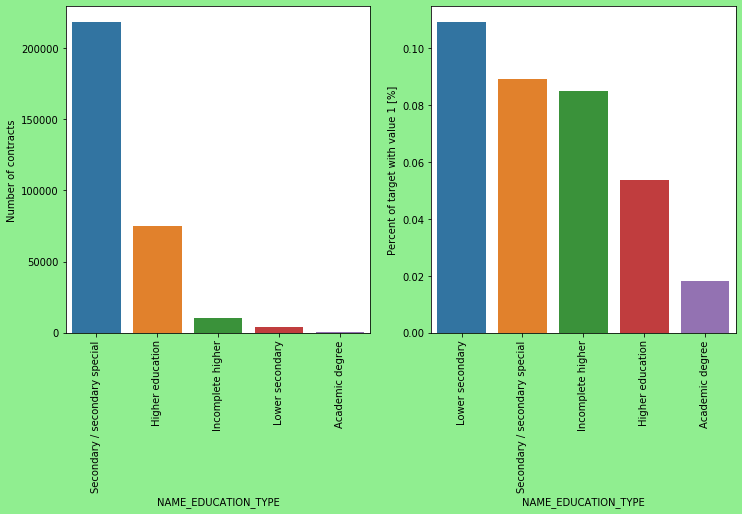

In [44]:
plot_stats('NAME_EDUCATION_TYPE',True)

**１０：大多数のクライアントは中等教育を受けており、次いで高等教育を受けているクライアントが多いです。ごく少数の方が学歴を持っています。
<br>
稀ではありますが、中等教育を受けていない人の割合が最も高いのは、中等教育を受けていない人です（11％）。アカデミックな学位を持っている人々は、2％未満の返済しない率を持っています。**

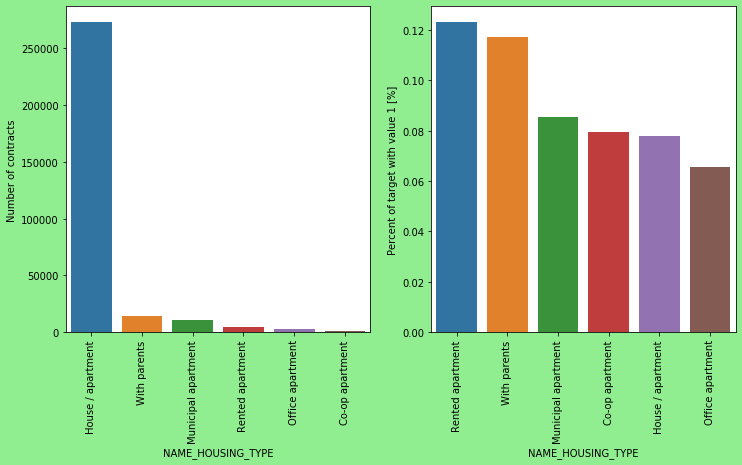

In [45]:
plot_stats('NAME_HOUSING_TYPE',True)

**１１：25万人以上の単位取得希望者が住宅登録をしています。以下のカテゴリーでは、「親あり」「市営アパート」の登録者数が非常に少なくなっています。
<br>
この中で、「賃貸アパート」と「親と一緒」は10％以上の未返済率が高い。**

In [48]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6), facecolor='lightgreen')
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

In [50]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure(facecolor='lightgreen')
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

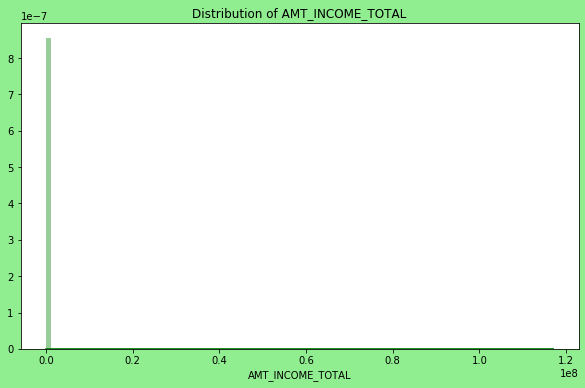

In [52]:
plot_distribution('AMT_INCOME_TOTAL','green')

**１２：顧客の収入の分布**

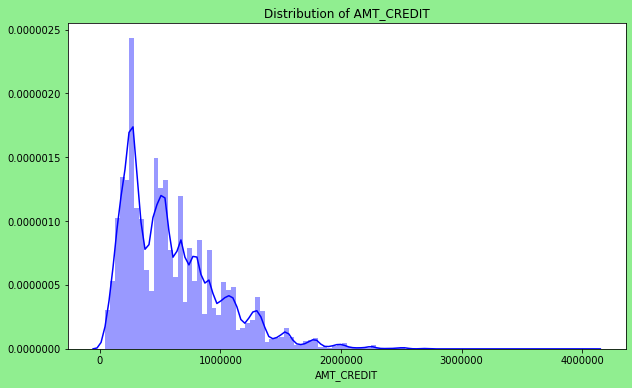

In [51]:
plot_distribution('AMT_CREDIT','blue')

**１３：ローンの与信額の分布**

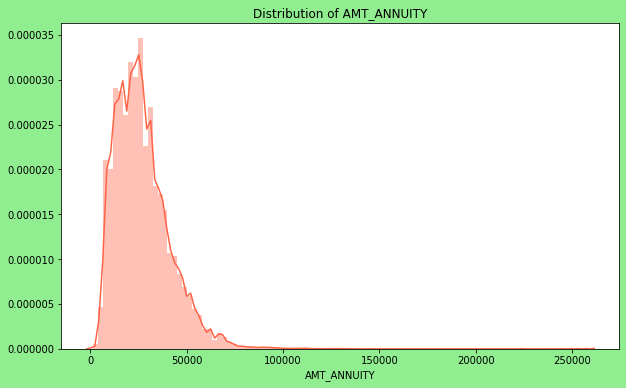

In [53]:
plot_distribution('AMT_ANNUITY','tomato')

**１４：年金ローンの分布**

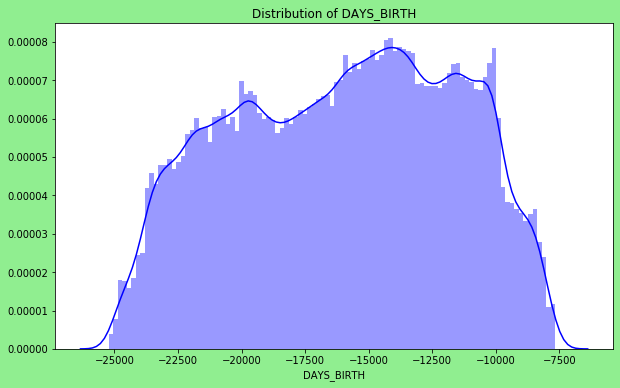

In [55]:
plot_distribution('DAYS_BIRTH','blue')

**１５：出生日の分布。マイナスの値は、生年月日が過去のものであることを意味します。年齢はおおよそ20歳から68歳までとなっています。** 

**相関係数ヒートマップでは特徴量と目的変数の関係が読み取れなかったがk、各特徴量をグラフ化すると、特徴量と目的変数の関係を読み取ることができる。<br>
世帯数、最終学歴や男女間で未返済率に偏りが見られた。**